In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import io



In [2]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.0 MB/s 


In [3]:
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import math
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt

# Loading the tweeet content data


In [4]:
df = pd.read_excel('export_dashboard_ea_2016_06_15_12_43_03_filt.xlsx')


In [5]:
df.tail()

,Tweet Id,Date,Hour,User Name,Tweet content,Followers
4990,714247266752593921,2016-03-28,00:26,Taylor,$EA there's a reason it's stalling right here....,1755.0
4991,714219957093924864,2016-03-27,22:38,Ca$h Ave. Wavy J,RT @TxUndergroundRa: @OriginalVaughn - Ave. $e...,489.0
4992,714218795447877632,2016-03-27,22:33,O.V.,RT @TxUndergroundRa: @OriginalVaughn - Ave. $e...,1024.0
4993,714217112043171840,2016-03-27,22:26,FinSentS NASDAQ,$EA:US Oculus' Virtual Reality Headset To Laun...,2746.0
4994,714211797738381312,2016-03-27,22:05,ProVesting,$EA:\n\nElectronic Arts (EA) Short Interest Di...,737.0


In [6]:
df.head()

,Tweet Id,Date,Hour,User Name,Tweet content,Followers
0,743021277988958208,2016-06-15,10:04,bored2tears,"#VR hardware is here, but robust game lineup i...",5172.0
1,743000607397679104,2016-06-15,08:42,Ken Edwards,OVAS Pacific Biosciences of California Inc. Ex...,71.0
2,742994939777286144,2016-06-15,08:19,Abu Sofyan Pabitjara,"$EA Rf xcw€•£*cc. Ze,*$*3,r#43€•¢t,😠°==™©•√",6.0
3,742992053852852224,2016-06-15,08:08,JennaKingtin1978,FXA CurrencyShares British Pound Sterling Trus...,86.0
4,742985503641894913,2016-06-15,07:42,ezzmoney2day,CBT Cabot Corp. Yield\nhttps://t.co/0kL5KBx2QD...,58.0


In [7]:
#ref : https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

sid_obj = SentimentIntensityAnalyzer()
scores = []
for comment in df['Tweet content']:
    vs1 = sid_obj.polarity_scores(comment)
    scores.append(vs1)
sentiment_scores = pd.DataFrame(scores)

In [8]:
sentiment_scores.head()

,neg,neu,pos,compound
0,0.000,0.829,0.171,0.4767
1,0.000,1.000,0.000,0.0000
2,0.292,0.708,0.000,-0.5106
3,0.000,0.798,0.202,0.5106
4,0.000,1.000,0.000,0.0000


In [9]:
#adding sentiment scores to our data 
merged_df = pd.merge(df, sentiment_scores['compound'], left_index=True, right_index=True)


In [10]:
merged_df.head()

,Tweet Id,Date,Hour,User Name,Tweet content,Followers,compound
0,743021277988958208,2016-06-15,10:04,bored2tears,"#VR hardware is here, but robust game lineup i...",5172.0,0.4767
1,743000607397679104,2016-06-15,08:42,Ken Edwards,OVAS Pacific Biosciences of California Inc. Ex...,71.0,0.0000
2,742994939777286144,2016-06-15,08:19,Abu Sofyan Pabitjara,"$EA Rf xcw€•£*cc. Ze,*$*3,r#43€•¢t,😠°==™©•√",6.0,-0.5106
3,742992053852852224,2016-06-15,08:08,JennaKingtin1978,FXA CurrencyShares British Pound Sterling Trus...,86.0,0.5106
4,742985503641894913,2016-06-15,07:42,ezzmoney2day,CBT Cabot Corp. Yield\nhttps://t.co/0kL5KBx2QD...,58.0,0.0000


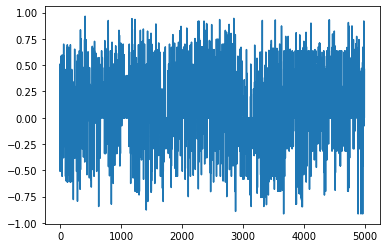

In [11]:
plt.plot(merged_df['compound'])

In [12]:
for i in range(len(merged_df)):
  if (merged_df['compound'][i]>=-0.05 and merged_df['compound'][i]<=0.05):
    merged_df['compound'][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
merged_df.head()

,Tweet Id,Date,Hour,User Name,Tweet content,Followers,compound
0,743021277988958208,2016-06-15,10:04,bored2tears,"#VR hardware is here, but robust game lineup i...",5172.0,0.4767
1,743000607397679104,2016-06-15,08:42,Ken Edwards,OVAS Pacific Biosciences of California Inc. Ex...,71.0,0.0000
2,742994939777286144,2016-06-15,08:19,Abu Sofyan Pabitjara,"$EA Rf xcw€•£*cc. Ze,*$*3,r#43€•¢t,😠°==™©•√",6.0,-0.5106
3,742992053852852224,2016-06-15,08:08,JennaKingtin1978,FXA CurrencyShares British Pound Sterling Trus...,86.0,0.5106
4,742985503641894913,2016-06-15,07:42,ezzmoney2day,CBT Cabot Corp. Yield\nhttps://t.co/0kL5KBx2QD...,58.0,0.0000


In [14]:
#sentiment score mulitplied by the number of followers of the account that tweeted
merged_df['weighted_sentiment'] = merged_df['compound'] * merged_df['Followers']
merged_df.head()

,Tweet Id,Date,Hour,User Name,Tweet content,Followers,compound,weighted_sentiment
0,743021277988958208,2016-06-15,10:04,bored2tears,"#VR hardware is here, but robust game lineup i...",5172.0,0.4767,2465.4924
1,743000607397679104,2016-06-15,08:42,Ken Edwards,OVAS Pacific Biosciences of California Inc. Ex...,71.0,0.0000,0.0000
2,742994939777286144,2016-06-15,08:19,Abu Sofyan Pabitjara,"$EA Rf xcw€•£*cc. Ze,*$*3,r#43€•¢t,😠°==™©•√",6.0,-0.5106,-3.0636
3,742992053852852224,2016-06-15,08:08,JennaKingtin1978,FXA CurrencyShares British Pound Sterling Trus...,86.0,0.5106,43.9116
4,742985503641894913,2016-06-15,07:42,ezzmoney2day,CBT Cabot Corp. Yield\nhttps://t.co/0kL5KBx2QD...,58.0,0.0000,0.0000


In [15]:
merged_df = (merged_df.groupby(merged_df.Date).mean())
merged_df.head()

,Tweet Id,Followers,compound,weighted_sentiment
Date,,,,
2016-03-27,7.142169e+17,1249.000000,0.114700,84.533900
2016-03-28,7.144333e+17,3731.804878,0.074698,723.898478
2016-03-29,7.147843e+17,4476.458333,0.101644,224.874328
2016-03-30,7.151729e+17,1897.916667,0.209617,206.110193
2016-03-31,7.155232e+17,4840.074074,0.082563,114.398100


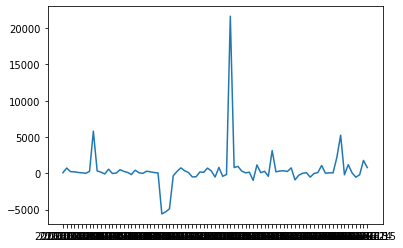

In [16]:
plt.plot(merged_df['weighted_sentiment'])

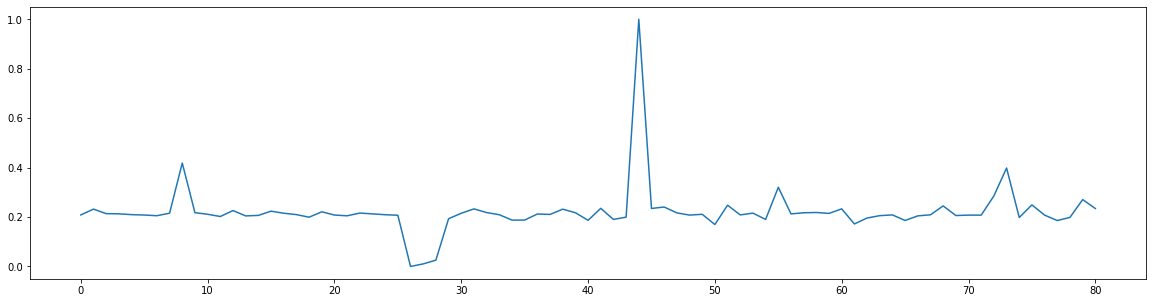

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

float_array = merged_df['weighted_sentiment'].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(scaled_array)





#ref : https://www.datasciencemadesimple.com/scaling-normalizing-column-pandas-dataframe-python/

In [18]:
merged_df['scaled_weighted_sentiment'] = scaled_array

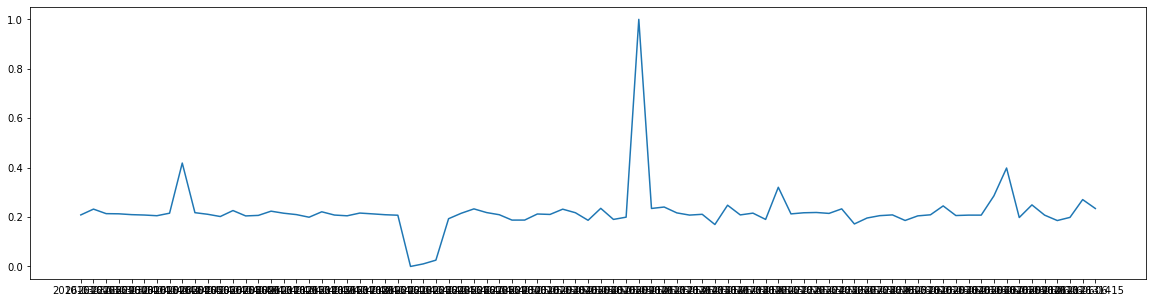

In [19]:

plt.plot(merged_df['scaled_weighted_sentiment'])

In [20]:
merged_df.head()

,Tweet Id,Followers,compound,weighted_sentiment,scaled_weighted_sentiment
Date,,,,,
2016-03-27,7.142169e+17,1249.000000,0.114700,84.533900,0.208537
2016-03-28,7.144333e+17,3731.804878,0.074698,723.898478,0.232031
2016-03-29,7.147843e+17,4476.458333,0.101644,224.874328,0.213694
2016-03-30,7.151729e+17,1897.916667,0.209617,206.110193,0.213004
2016-03-31,7.155232e+17,4840.074074,0.082563,114.398100,0.209634


# Reading data from yahoo finance and normalizing it

In [25]:
df = pd.read_csv('EA.csv')
dates = df["Date"].values
df.drop(['Volume', 'Close'], 1, inplace=True)
min_max_scaler = preprocessing.MinMaxScaler()
df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
df.set_index('Date', inplace=True)
df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Adj Close
Date,,,,
2016-03-28,0.156005,0.165922,0.159642,0.181168
2016-03-29,0.180809,0.252712,0.213282,0.271428
2016-03-30,0.325718,0.302489,0.330779,0.296104
2016-03-31,0.299608,0.298660,0.293742,0.276624
2016-04-01,0.236292,0.236120,0.257343,0.264286


In [26]:
df['change'] = (df['Adj Close'] - df['Adj Close'].shift(1)) 
df = df[1:]
df['change'].head()
#positive inc in adj closure 
#neg dec in adj closure


Date
2016-03-29    0.090260
2016-03-30    0.024676
2016-03-31   -0.019481
2016-04-01   -0.012337
2016-04-04   -0.011689
Name: change, dtype: float64

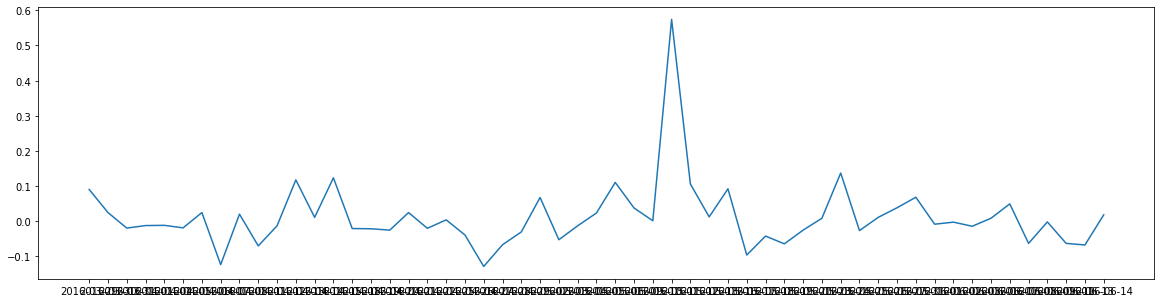

In [27]:
plt.plot(df['change'] )

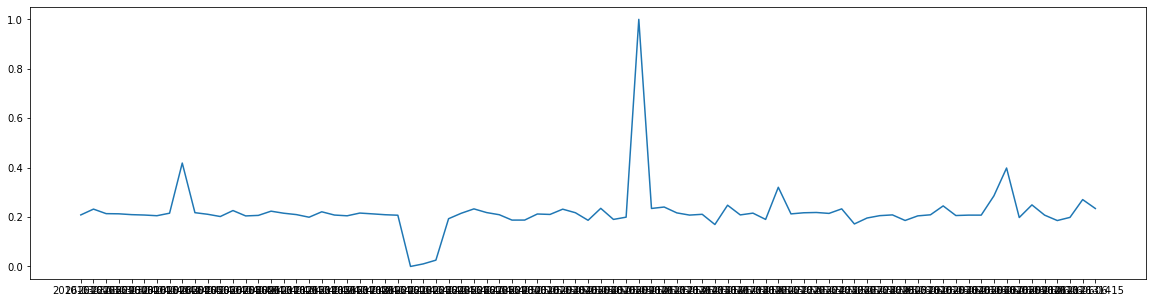

In [28]:
plt.plot(merged_df['scaled_weighted_sentiment'])

In [29]:
#df['signal'] = df['change'].apply(lambda x: 1 if x >=0 else -1)
#1 : up trend , sell
#-1 : dowm trend , buy
df[:10]

,Open,High,Low,Adj Close,change
Date,,,,,
2016-03-29,0.180809,0.252712,0.213282,0.271428,0.090260
2016-03-30,0.325718,0.302489,0.330779,0.296104,0.024676
2016-03-31,0.299608,0.298660,0.293742,0.276624,-0.019481
2016-04-01,0.236292,0.236120,0.257343,0.264286,-0.012337
2016-04-04,0.278068,0.259732,0.273308,0.252597,-0.011689
2016-04-05,0.219321,0.225909,0.252235,0.233766,-0.018832
2016-04-06,0.256527,0.232929,0.265006,0.258441,0.024675
2016-04-07,0.258485,0.222719,0.164112,0.135065,-0.123376
2016-04-08,0.155353,0.145501,0.139208,0.155195,0.020130


In [30]:
df = pd.merge(df, merged_df[['scaled_weighted_sentiment']],left_index=True, right_index=True)
df.head()






,Open,High,Low,Adj Close,change,scaled_weighted_sentiment
Date,,,,,,
2016-03-29,0.180809,0.252712,0.213282,0.271428,0.090260,0.213694
2016-03-30,0.325718,0.302489,0.330779,0.296104,0.024676,0.213004
2016-03-31,0.299608,0.298660,0.293742,0.276624,-0.019481,0.209634
2016-04-01,0.236292,0.236120,0.257343,0.264286,-0.012337,0.208101
2016-04-04,0.278068,0.259732,0.273308,0.252597,-0.011689,0.418465


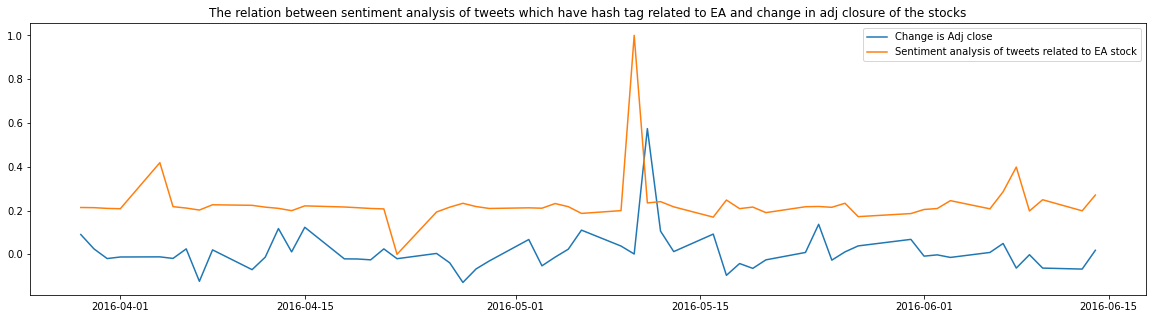

In [33]:
df.index = pd.to_datetime(df.index)
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(df['change'],label = 'Change is Adj close')
plt.plot(df['scaled_weighted_sentiment'], label = 'Sentiment analysis of tweets related to EA stock')
plt.title("The relation between sentiment analysis of tweets which have hash tag related to EA and change in adj closure of the stocks")
plt.legend()

# Creating feature set

In [82]:
def ts_features(data):
    features = pd.DataFrame()
    features['scaled_weighted_sentiment'] = data['scaled_weighted_sentiment'].values
    features['change_lag 1'] = data['change'].shift(1).values
    features["month"] = data.index.month
    features["week"] = data.index.week
    features["day_of_week"] = data.index.day_of_week
    #it will be probably useful to add a feature with num of hodidays in that month as well
    features.index = data.index
    features = features[1:]
    target = df['change'].values[1:]
    return features, target

X,Y = ts_features(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [83]:
X.head()

,scaled_weighted_sentiment,change_lag 1,month,week,day_of_week
Date,,,,,
2016-03-30,0.213004,0.090260,3,13,2
2016-03-31,0.209634,0.024676,3,13,3
2016-04-01,0.208101,-0.019481,4,13,4
2016-04-04,0.418465,-0.012337,4,14,0
2016-04-05,0.217599,-0.011689,4,14,1


In [36]:
len(X)


54

In [84]:
test_n = len(X) * 30 // 100 #30 % for test
X_train = X[:-test_n]
X_test = X[-test_n:]
y_train = Y[:-test_n]
y_test = Y[-test_n :]

# Linear model

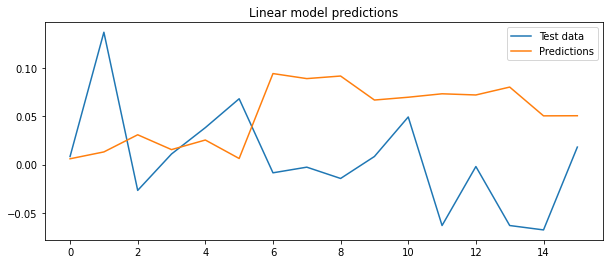

In [88]:
# testing of simple linear regression model for time series analysis
from sklearn.model_selection import (TimeSeriesSplit, train_test_split, 
                                     cross_val_score)
from sklearn.linear_model import Ridge
from sklearn import linear_model as lm 
from sklearn.metrics import mean_squared_error




lm_model = lm.LinearRegression()
#lr_model = Ridge(alpha=5)

lm_model.fit(X_train, y_train)

# evaluate the model on the test set
predictions = lm_model.predict(X_test)
plt.rcParams['figure.figsize'] = (10,4)
plt.plot(y_test, label = "Test data")
plt.plot(predictions,label ="Predictions")
plt.title("Linear model predictions")
plt.legend()
linear_mse = (mean_squared_error(y_test, predictions))

# Decision tree


In [89]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor

decisiontree= DecisionTreeRegressor(max_depth=4)
model = decisiontree.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

dt_mse = mean_squared_error(y_test, y_test_pred)



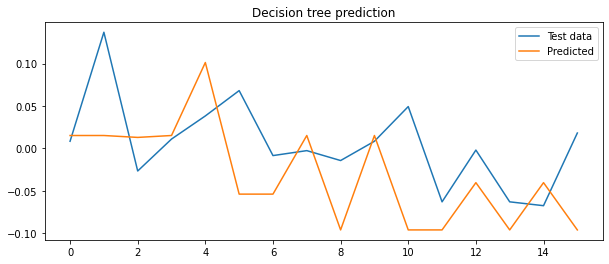

In [90]:
plt.rcParams['figure.figsize'] = (10,4)
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Decision tree prediction')
plt.legend()

# Random forest

In [92]:
#random forest
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(random_state=5, bootstrap=0, n_estimators=1000)

model=randomforest.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

random_mse = mean_squared_error(y_test, y_test_pred)

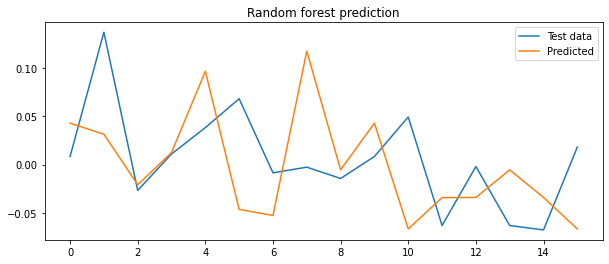

In [93]:
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Random forest prediction')
plt.legend()

# XGBoost model

In [94]:
from xgboost import XGBRegressor as xgb
xgbc = xgb(max_depth = 10, learning_rate = 0.06, n_estimators = 700)
xgbc.fit(X_train, y_train)
y_test_pred = xgbc.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_test_pred)

[17:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


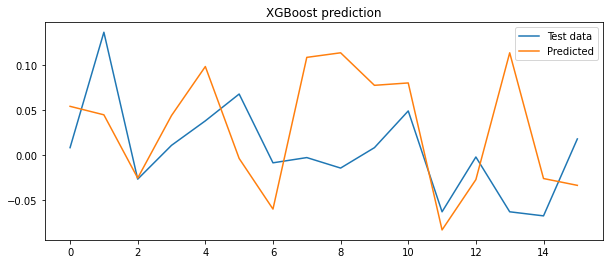

In [95]:
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('XGBoost prediction')
plt.legend()

# SVM model

In [96]:
from sklearn import svm
svm_mod = svm.SVR(kernel="rbf")
svm_mod.fit(X_train, y_train)
y_test_pred = svm_mod.predict(X_test)
svm_mse = mean_squared_error(y_test, y_test_pred)

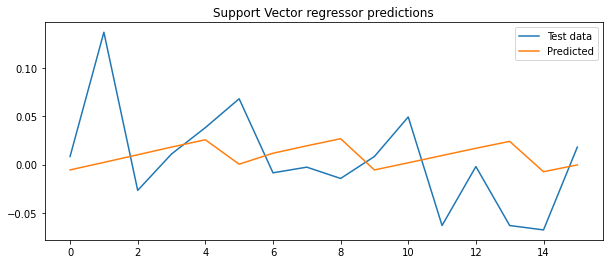

In [97]:
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Support Vector regressor predictions')
plt.legend()

In [65]:
from tabulate import tabulate
table = [['Model', 'MSE'], ['Linear', linear_mse], ['Desicion tree',dt_mse], ['Random forest', random_mse],['SVM', svm_mse],['XGBoost', xgb_mse]]

In [66]:
print(tabulate(table))

-------------  ---------------------
Model          MSE
Linear         0.007264646070439742
Desicion tree  0.007529446099186769
Random forest  0.004589472915330793
SVM            0.0029163756557940425
XGBoost        0.005918947994361408
-------------  ---------------------
